In [1]:
"""
    INDUSTRIAL ENERGY PRODUCTION INDEX FROM JAN 1992 TO JAN 2019
"""

'\n    INDUSTRIAL ENERGY PRODUCTION INDEX FROM JAN 1992 TO JAN 2019\n'

In [14]:
import torch.nn.functional as F
import torch
import numpy as np
x = F.softmax(torch.tensor([0.8, 0.3, 0.2, 0.4]))
x
char = np.random.choice([8,10,2], p=0.5)

C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  after removing the cwd from sys.path.


TypeError: object of type 'float' has no len()

In [15]:
import torch
import torch.nn as nn
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

df = pd.read_csv('../Data/TimeSeriesData/Energy_Production.csv',index_col=0,parse_dates=True)
df.dropna(inplace=True)
print(len(df))
df.head()

C:\Users\drang\anaconda3\envs\pytorchy\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\drang\anaconda3\envs\pytorchy\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\drang\anaconda3\envs\pytorchy\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\sklearn\utils\validation.py:37: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  LARGE_SPARSE_SUPPORTED = LooseVersion(scipy_version) >= '0.14.0'
C:\Users\drang\anaconda3\envs\pytorchy\lib\importlib\_bootstrap.py:219

325


,IPG2211A2N
DATE,
1992-01-01,85.5560
1992-02-01,80.4178
1992-03-01,74.7390
1992-04-01,69.8367
1992-05-01,67.3781


In [16]:
y = df['IPG2211A2N'].values.astype(float)

test_size = 12
window_size = 12

train_set = y[:-test_size]
test_set = y[-test_size:]


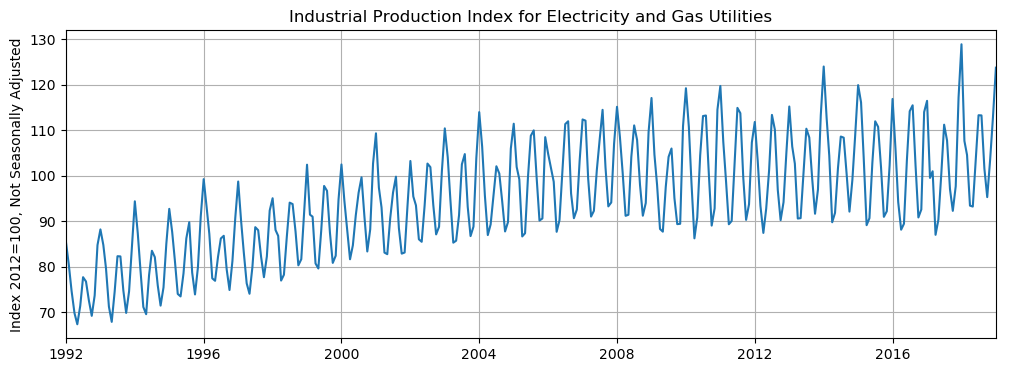

In [17]:
plt.figure(figsize=(12,4))
plt.title('Industrial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['IPG2211A2N'])
#plt.plot(pd.date_range('01/01/2018', periods = 12, freq ='MS'), test_set)



In [18]:
print(f'Train: {len(train_set)}')
print(f'Test:  {len(test_set)}')

Train: 313
Test:  12


In [19]:
scaler = MinMaxScaler(feature_range=(-1, 1))


train_norm = scaler.fit_transform(train_set.reshape(-1,1))
train_norm.shape

(313, 1)

In [20]:

print(f'First item, original: {train_set[0]}')
print(f'First item, scaled:  {train_norm[0]}')
LS = len(train_norm)
LS

First item, original: 85.556
First item, scaled:  [-0.4091274]


313

In [21]:

train_norm = torch.FloatTensor(train_norm).view(-1)

def input_data(seq,ws):
    out = []
    L = len(seq)
    for i in range(L-ws):
        window = seq[i:i+ws]
        label = seq[i+ws:i+ws+1]
        out.append((window,label))
    return out

In [22]:
train_data = input_data(train_norm,window_size)
train_data

[(tensor([-0.4091, -0.5761, -0.7607, -0.9201, -1.0000, -0.8686, -0.6636, -0.6944,
          -0.8313, -0.9396, -0.7939, -0.4343]),
  tensor([-0.3223])),
 (tensor([-0.5761, -0.7607, -0.9201, -1.0000, -0.8686, -0.6636, -0.6944, -0.8313,
          -0.9396, -0.7939, -0.4343, -0.3223]),
  tensor([-0.4340])),
 (tensor([-0.7607, -0.9201, -1.0000, -0.8686, -0.6636, -0.6944, -0.8313, -0.9396,
          -0.7939, -0.4343, -0.3223, -0.4340]),
  tensor([-0.5999])),
 (tensor([-0.9201, -1.0000, -0.8686, -0.6636, -0.6944, -0.8313, -0.9396, -0.7939,
          -0.4343, -0.3223, -0.4340, -0.5999]),
  tensor([-0.8734])),
 (tensor([-1.0000, -0.8686, -0.6636, -0.6944, -0.8313, -0.9396, -0.7939, -0.4343,
          -0.3223, -0.4340, -0.5999, -0.8734]),
  tensor([-0.9827])),
 (tensor([-0.8686, -0.6636, -0.6944, -0.8313, -0.9396, -0.7939, -0.4343, -0.3223,
          -0.4340, -0.5999, -0.8734, -0.9827]),
  tensor([-0.7669])),
 (tensor([-0.6636, -0.6944, -0.8313, -0.9396, -0.7939, -0.4343, -0.3223, -0.4340,
      

In [23]:
print(f'Train_data: {len(train_data)}', train_data[1])  
train_data[0][0].dtype

Train_data: 301 (tensor([-0.5761, -0.7607, -0.9201, -1.0000, -0.8686, -0.6636, -0.6944, -0.8313,
        -0.9396, -0.7939, -0.4343, -0.3223]), tensor([-0.4340]))


torch.float32

## 4. Define the model
Design a model that has a (1,64) LSTM layer and a (64,1) fully-connected linear layer. Be sure to initialize $h_0$ and $c_0$, and return only the last predicted value.

In [24]:
#a model that has a (1,64) LSTM layer and a (64,1) fully-connected linear layer also to initialize  ℎ0  and  𝑐0 
class LSTMnetwork(nn.Module):
    def __init__(self, in_size=1, hidden_size=64, out_size=1):
        super().__init__()
        self.hidden_size = hidden_size
        self.lstm = nn.LSTM(in_size, hidden_size)
        self.fc = nn.Linear(hidden_size, out_size)
        self.hidden = (torch.zeros(1, 1, hidden_size).cuda(), torch.zeros(1, 1, hidden_size).cuda())
        
    def forward(self, seq):
        lstm_out, self.hidden = self.lstm(seq.view(len(seq), 1, -1), self.hidden)
        outt = self.fc(lstm_out.view(len(seq), -1))
        return outt[-1]


In [25]:
torch.manual_seed(101)
model = LSTMnetwork()
gpumodel = model.cuda()

In [26]:
gpumodel

LSTMnetwork(
  (lstm): LSTM(1, 64)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)

In [27]:
type(test_set[1])

numpy.float64

In [28]:

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(gpumodel.parameters(), lr = 0.001)


Epoch:  1 Loss: 0.73148888


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


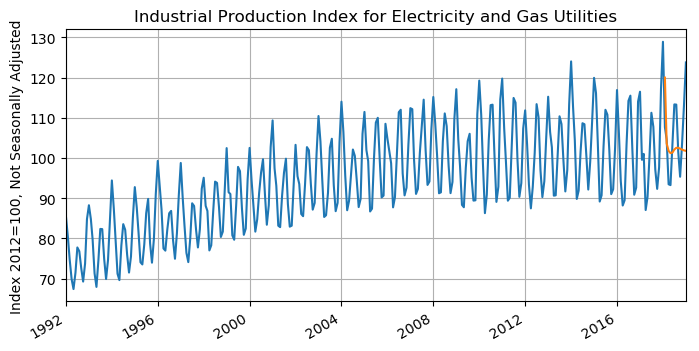

Epoch:  2 Loss: 0.32154271


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


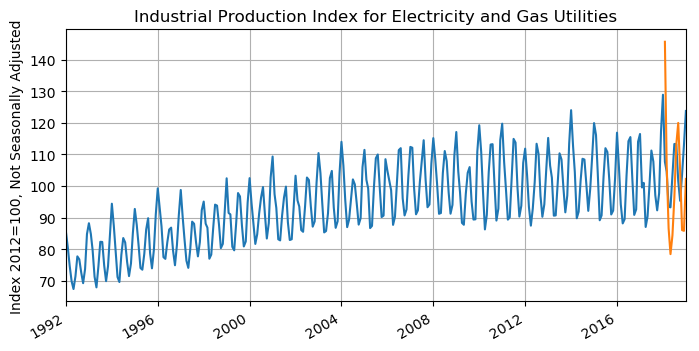

Epoch:  3 Loss: 0.24067900


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


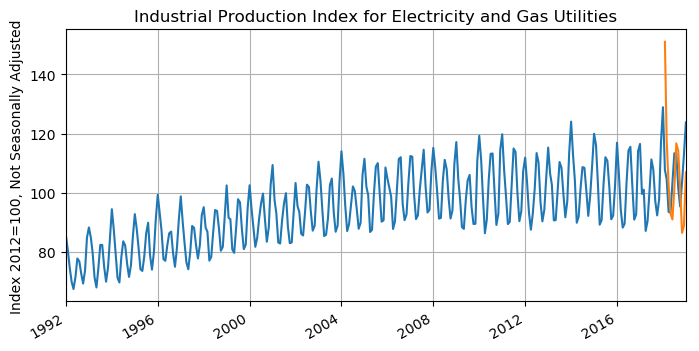

Epoch:  4 Loss: 0.22756186


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


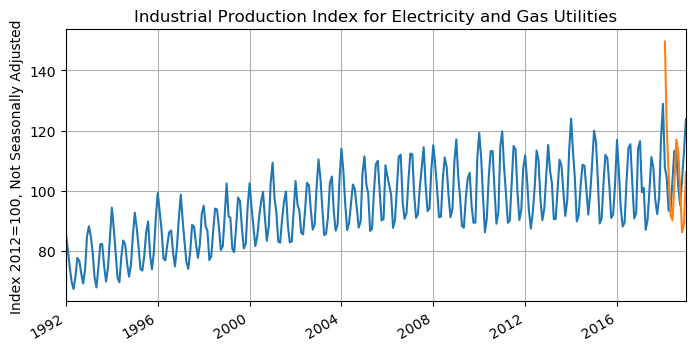

Epoch:  5 Loss: 0.21155123


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


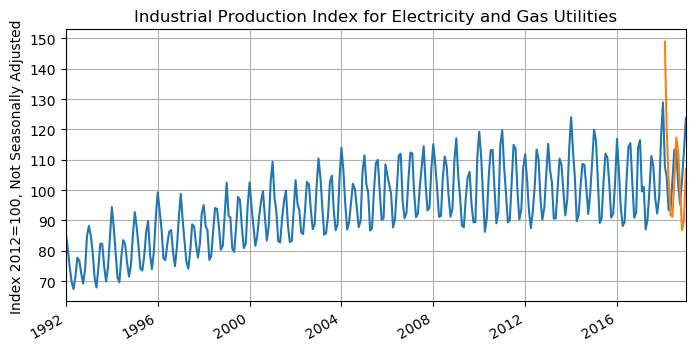

Epoch:  6 Loss: 0.19909397


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


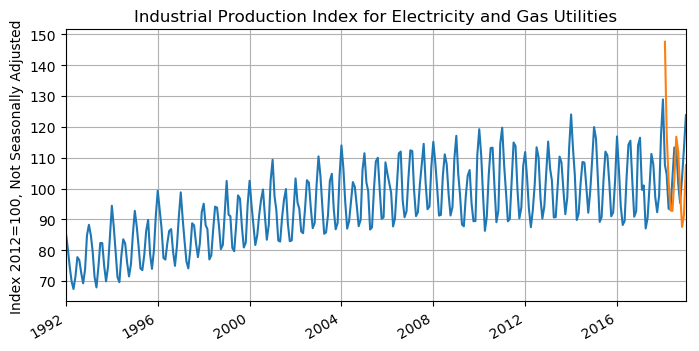

Epoch:  7 Loss: 0.19070980


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


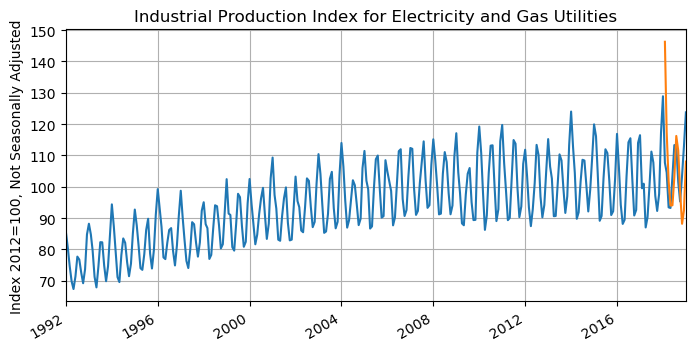

Epoch:  8 Loss: 0.18484065


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


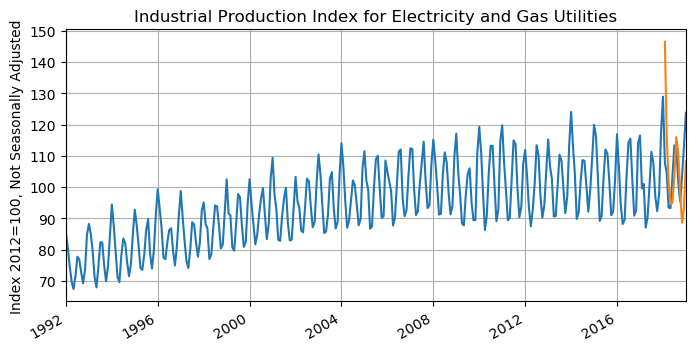

Epoch:  9 Loss: 0.17965089


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


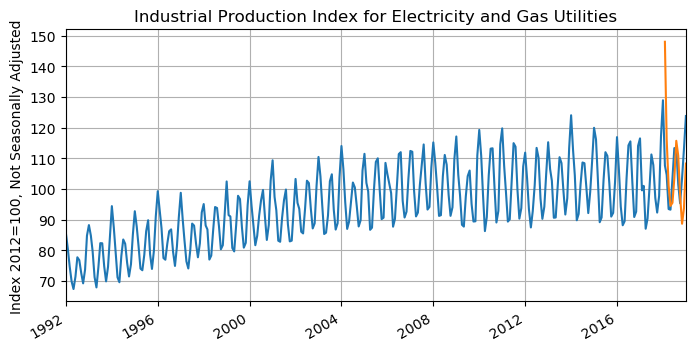

Epoch: 10 Loss: 0.17444247


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


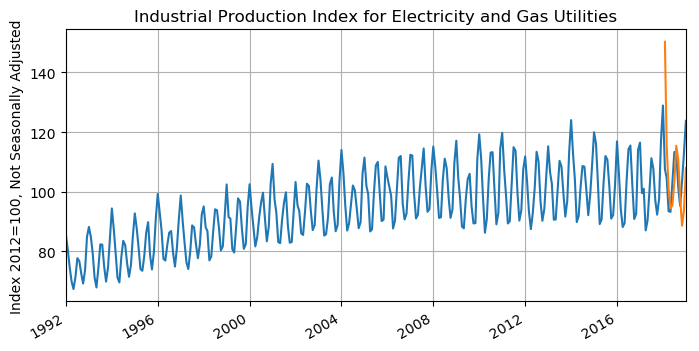

Epoch: 11 Loss: 0.16900921


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


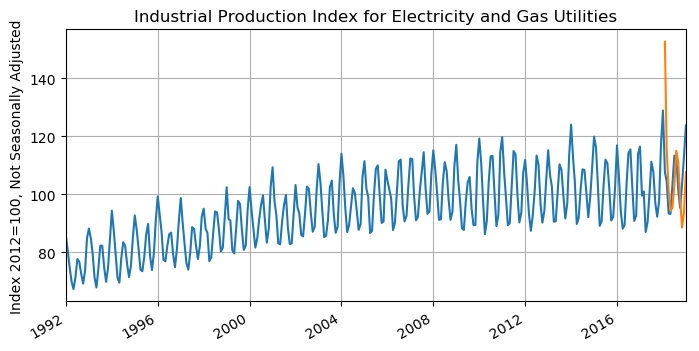

Epoch: 12 Loss: 0.16327691


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


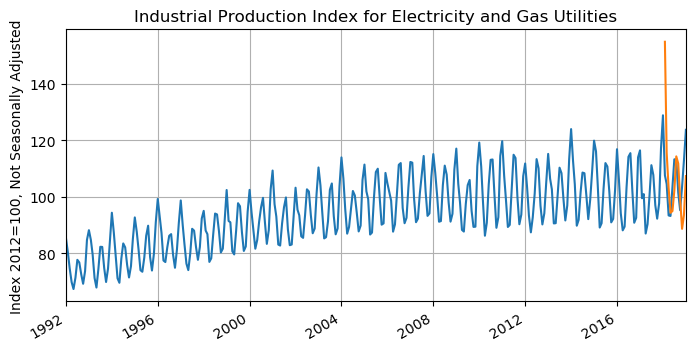

Epoch: 13 Loss: 0.15734854


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


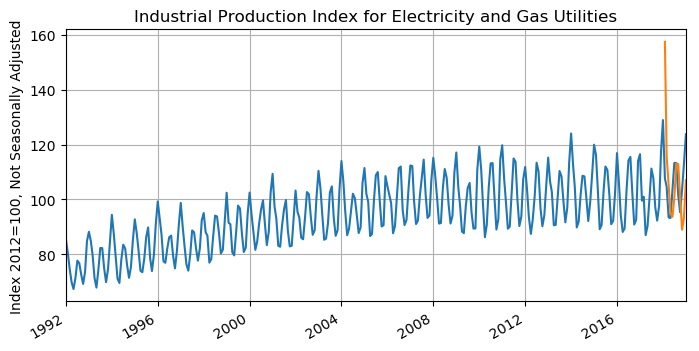

Epoch: 14 Loss: 0.15141533


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


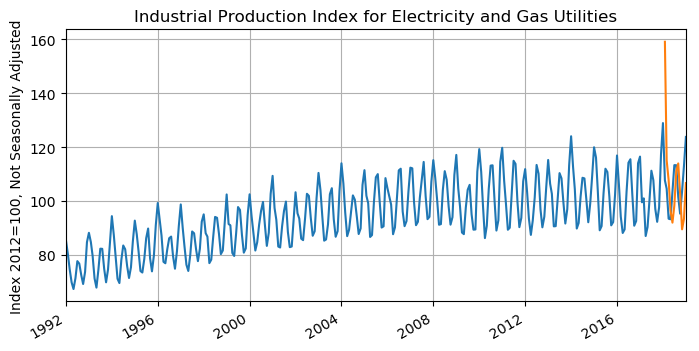

Epoch: 15 Loss: 0.14568540


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


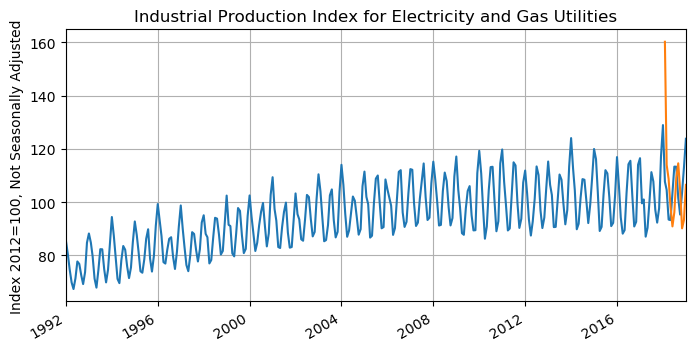

Epoch: 16 Loss: 0.14033337


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


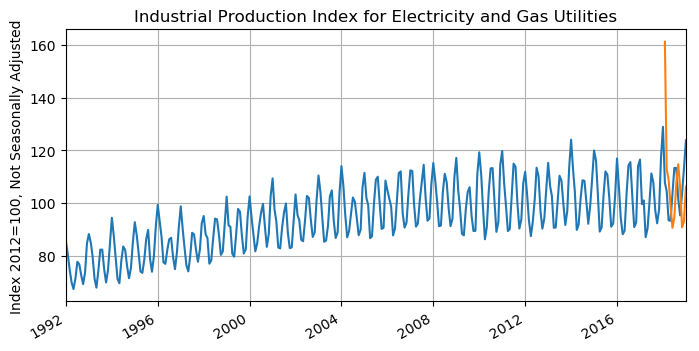

Epoch: 17 Loss: 0.13546899


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


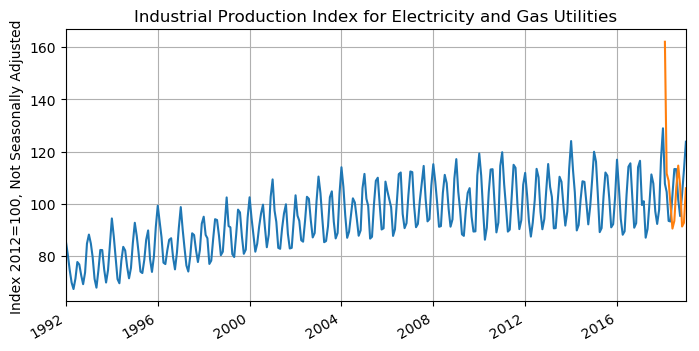

Epoch: 18 Loss: 0.13113390


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


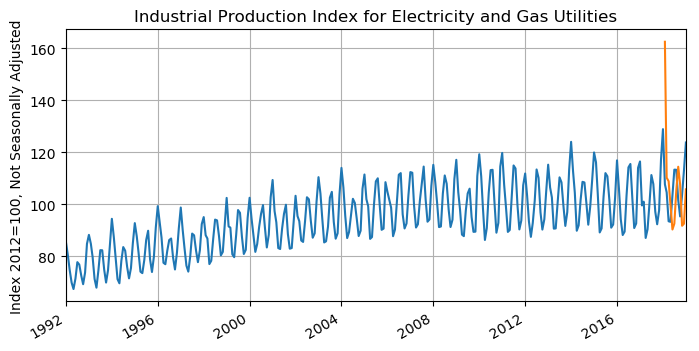

Epoch: 19 Loss: 0.12731297


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


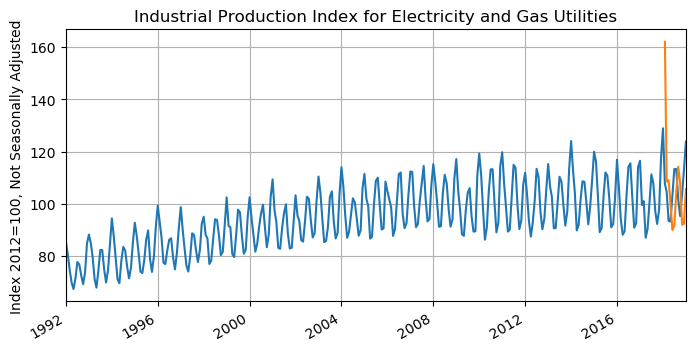

Epoch: 20 Loss: 0.12395491


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


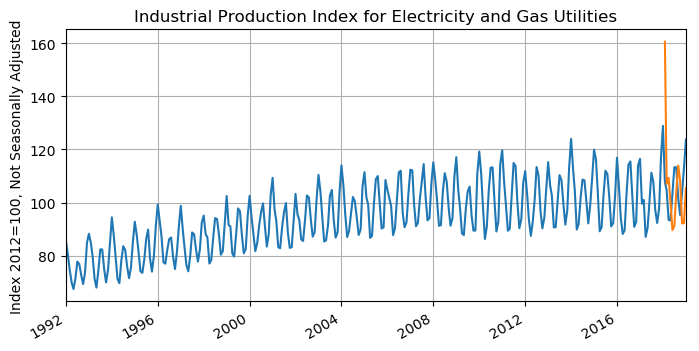

Epoch: 21 Loss: 0.12099446


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


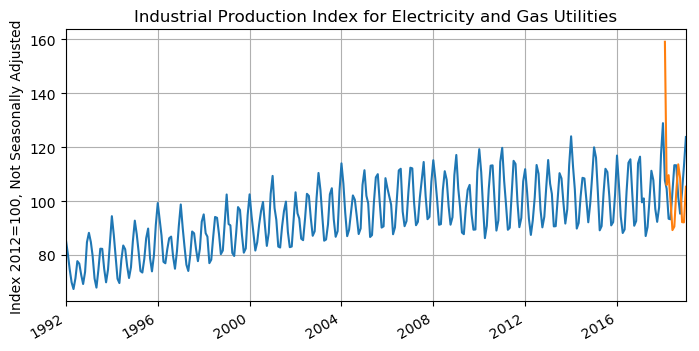

Epoch: 22 Loss: 0.11836986


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


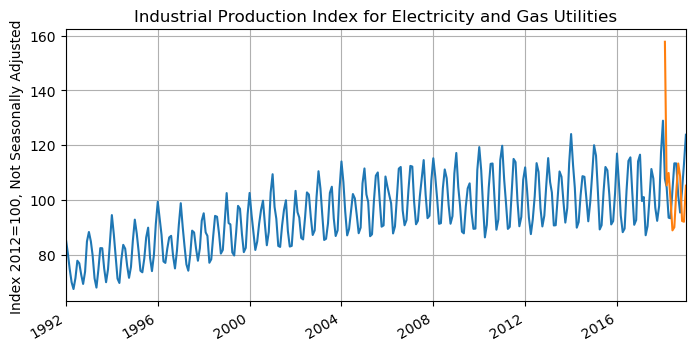

Epoch: 23 Loss: 0.11603164


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


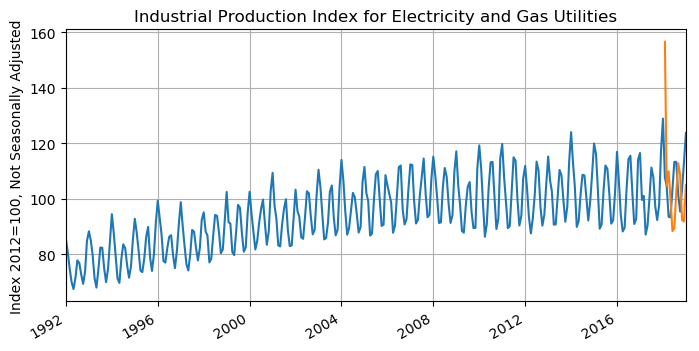

Epoch: 24 Loss: 0.11394261


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


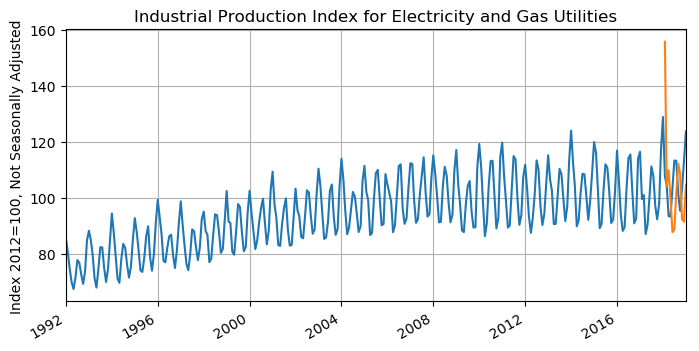

Epoch: 25 Loss: 0.11207756


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


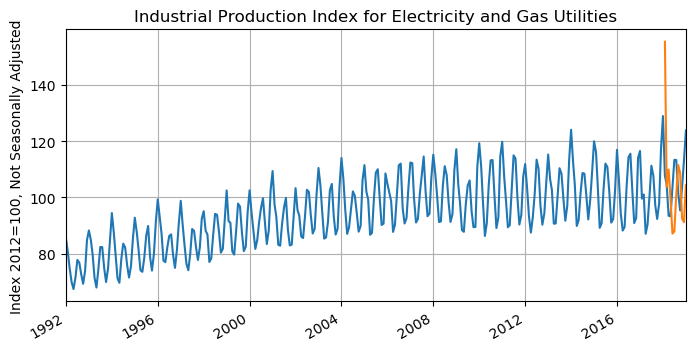

Epoch: 26 Loss: 0.11042286


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


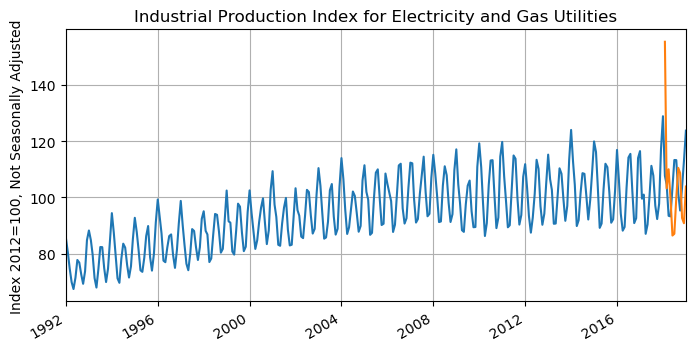

Epoch: 27 Loss: 0.10897982


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


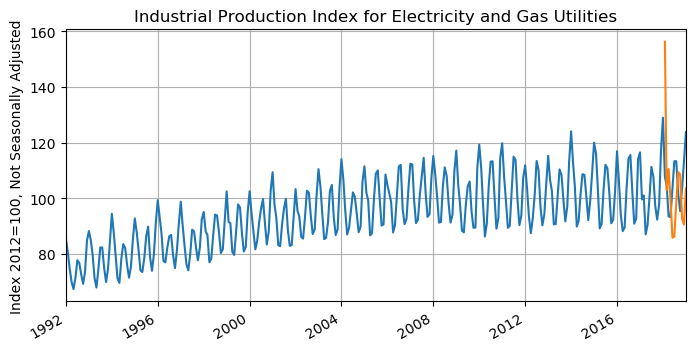

Epoch: 28 Loss: 0.10776708


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


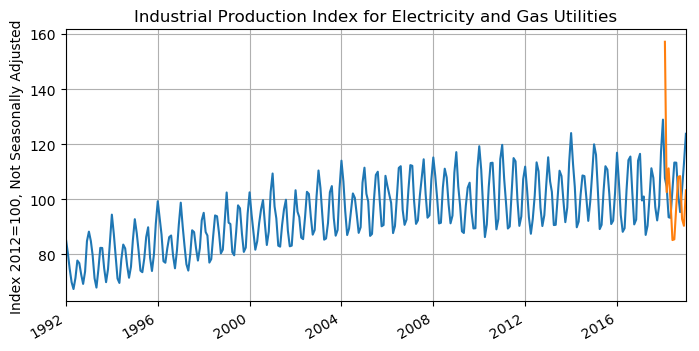

Epoch: 29 Loss: 0.10681635


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


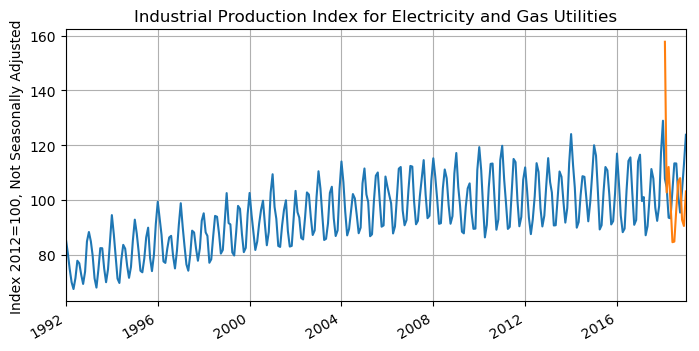

Epoch: 30 Loss: 0.10615853


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


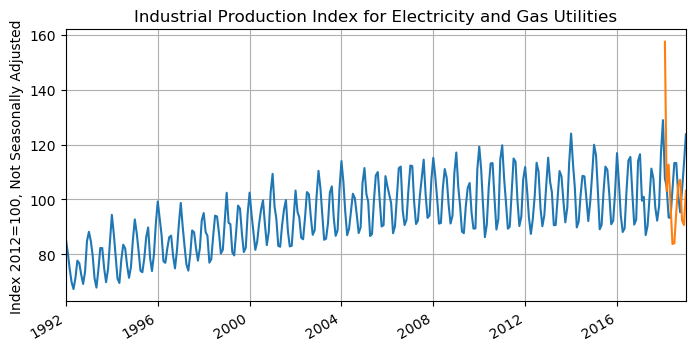

Epoch: 31 Loss: 0.10583404


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


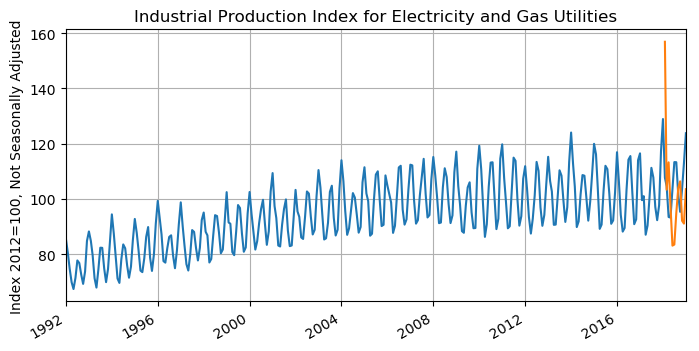

Epoch: 32 Loss: 0.10595258


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


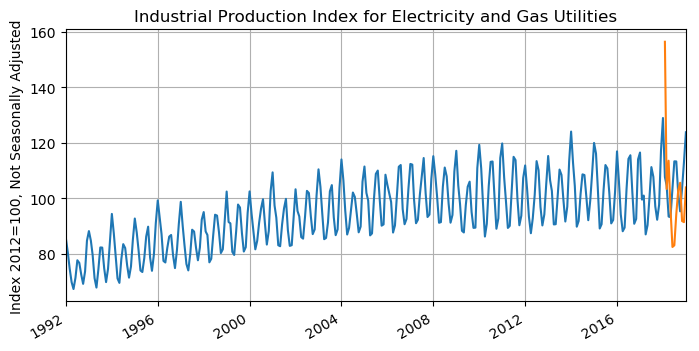

Epoch: 33 Loss: 0.10659042


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


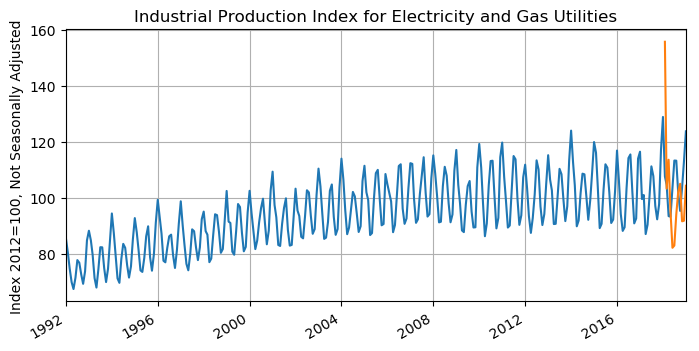

Epoch: 34 Loss: 0.10754252


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


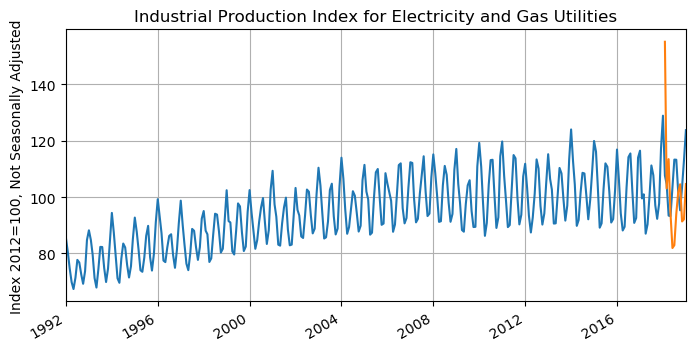

Epoch: 35 Loss: 0.10849239


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


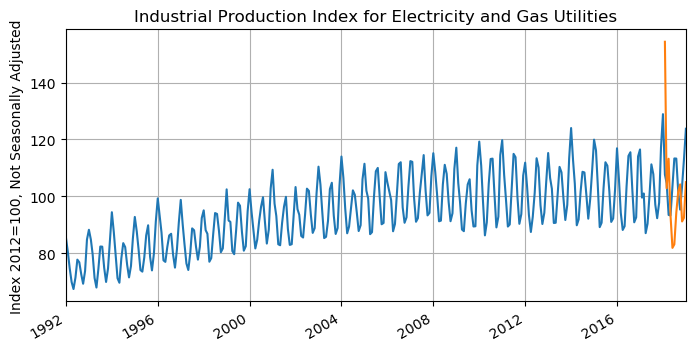

Epoch: 36 Loss: 0.10928912


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


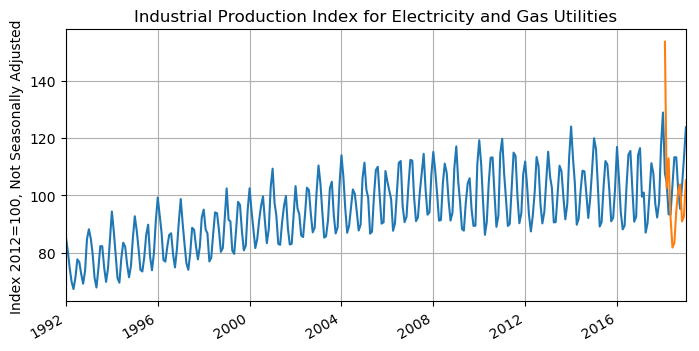

Epoch: 37 Loss: 0.10990790


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


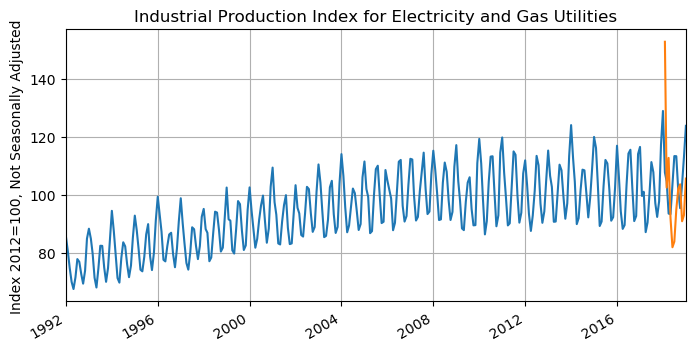

Epoch: 38 Loss: 0.11036333


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


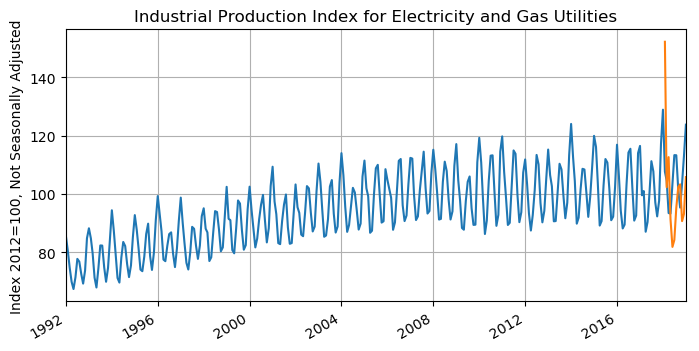

Epoch: 39 Loss: 0.11067978


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


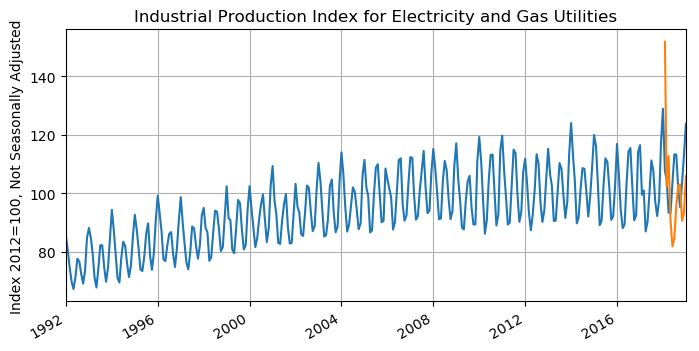

Epoch: 40 Loss: 0.11088321


C:\Users\drang\anaconda3\envs\pytorchy\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([12])) that is different to the input size (torch.Size([12, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


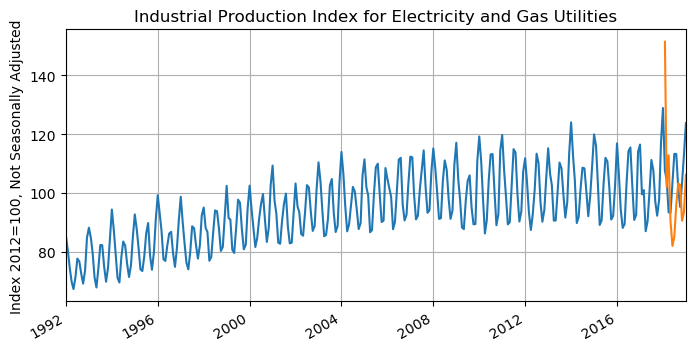

modeltime: 49.424623012542725


In [29]:
#TRAINING
import time
st = time.time()
gpumodel.train()
epochs = 40
train_loss = []
test_loss = []


for i in range(epochs): 
    
    for train_x, train_y in train_data:
        train_x = train_x.cuda()
        train_y = train_y.cuda()
        optimizer.zero_grad()
        gpumodel.hidden = (torch.zeros(1, 1, gpumodel.hidden_size).cuda(), torch.zeros(1, 1, gpumodel.hidden_size).cuda())
        pred = gpumodel(train_x)
        loss = criterion(pred, train_y)
        loss.backward()
        optimizer.step()
        
    train_loss.append(loss.cpu().detach().numpy())
    print(f'Epoch: {i+1:2} Loss: {loss.cpu().item():10.8f}')
    test = train_set[-window_size:].tolist()
    future = 12
    
    
    gpumodel.hidden = (torch.zeros(1, 1, gpumodel.hidden_size).cuda(), torch.zeros(1, 1, gpumodel.hidden_size).cuda())
    gpumodel.eval()
    for i in range(future):
           
        seqs = torch.FloatTensor(test[-window_size:]).cuda() 
        with torch.no_grad():
            
            
            pre = gpumodel(seqs)
            test.append(pre.cpu().detach().item())
           
        
    true_predictions = scaler.inverse_transform(np.array(test[window_size:]).reshape(-1,1))     
    loss = criterion(torch.tensor(true_predictions), torch.tensor(test_set[:window_size]))
    #print(true_predictions, loss)      
    test_loss.append(loss.cpu().detach().numpy())
    gpumodel.train()   
            
    fig = plt.figure(figsize=(8,4))
    plt.title('Industrial Production Index for Electricity and Gas Utilities')
    plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
    plt.grid(True)
    plt.autoscale(axis='x',tight=True)
    fig.autofmt_xdate()
    plt.plot(df['IPG2211A2N'])
    plt.plot(np.arange('2018-02-01', '2019-02-01', dtype='datetime64[M]').astype('datetime64[D]'), true_predictions)
    plt.show()
print("modeltime:",time.time()-st)

In [ ]:
"""
SINCE MODEL.EVAL() DOESNT COMPLETELY CLEARS BACKWARD()/ DUE TO SOME BIAS, MODELS 1ST VALUE IS ACTING STRANGELY
BUT TRAIN AND VALIDATING IN SEPARATE CELL WORKS FINE
"""

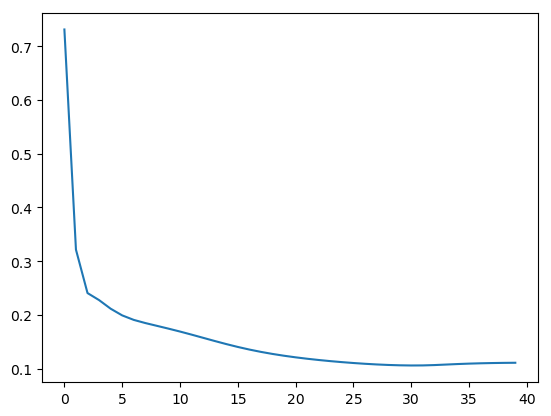

In [30]:
plt.plot(train_loss)


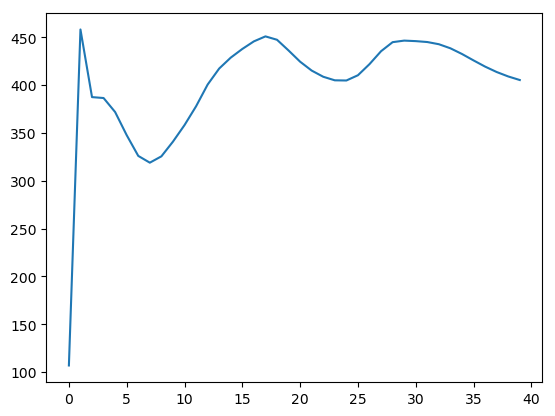

In [31]:
plt.plot(test_loss)

In [18]:
future = 12
preds = train_norm[-window_size:].tolist()

model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:]).cuda()
    with torch.no_grad():
        gpumodel.hidden = (torch.zeros(1,1,model.hidden_size).cuda(),
                        torch.zeros(1,1,model.hidden_size).cuda())
        preds.append(gpumodel(seq).cpu().item())
        
preds[window_size:]

[0.271289587020874,
 -0.0024323295801877975,
 -0.34414443373680115,
 -0.23893176019191742,
 0.22653545439243317,
 0.48718902468681335,
 0.27138033509254456,
 -0.0976850688457489,
 -0.2826024889945984,
 -0.02056693844497204,
 0.5057976841926575,
 0.6232981085777283]

In [19]:
true_predictions = scaler.inverse_transform(np.array(preds[window_size:]).reshape(-1, 1))
true_predictions

array([[106.4886885 ],
       [ 98.0677706 ],
       [ 87.55516857],
       [ 90.79198386],
       [105.11184999],
       [113.13072675],
       [106.49148032],
       [ 95.1373677 ],
       [ 89.44847573],
       [ 97.50986842],
       [113.70321286],
       [117.31805466]])

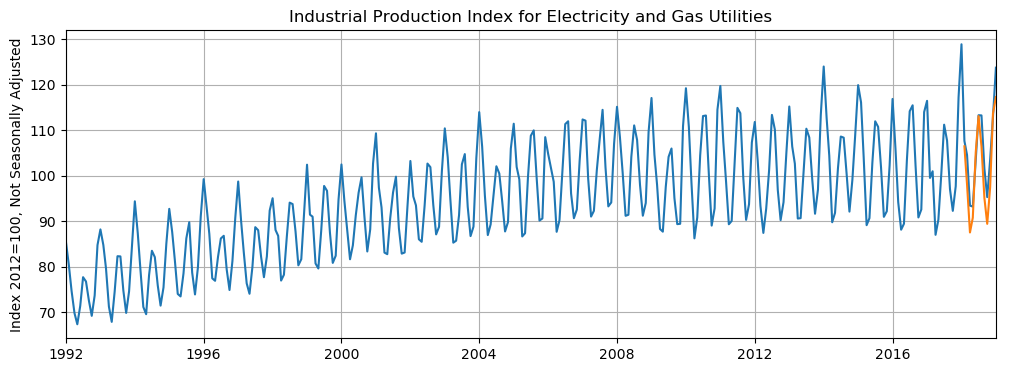

In [20]:
x = np.arange('2018-02-01', '2019-02-01', dtype='datetime64[M]').astype('datetime64[D]')

plt.figure(figsize=(12,4))
plt.title('Industrial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['IPG2211A2N'])
plt.plot(x,true_predictions)
plt.show()

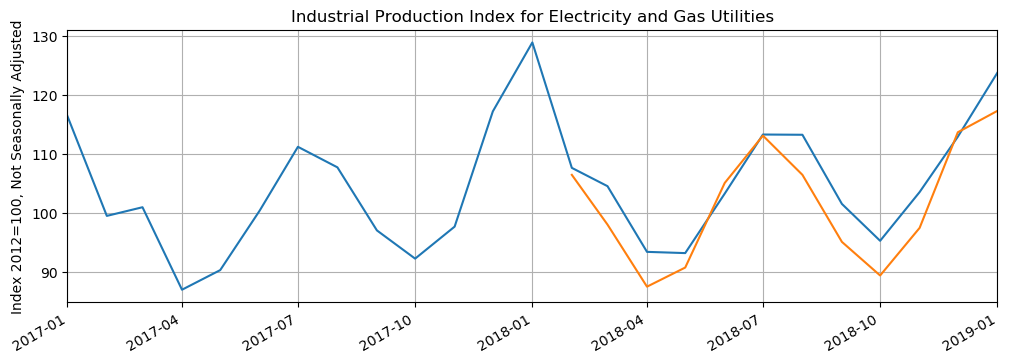

In [25]:
fig = plt.figure(figsize=(12,4))
plt.title('Industrial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['IPG2211A2N']['2017-01-01':])
plt.plot(x,true_predictions)
plt.show()

In [35]:
#retraining for speed test and new unseen data forecast
epochs = 100

# set model to back to training mode
gpumodel.train()

# feature scale the entire dataset
y_norm = scaler.fit_transform(y.reshape(-1, 1))
y_norm = torch.FloatTensor(y_norm).view(-1)
all_data = input_data(y_norm,window_size)

import time
start_time = time.time()

for epoch in range(epochs):
    
    # train on the full set of sequences
    for seq, y_train in all_data:  
        seq = seq.cuda()
        y_train = y_train.cuda()
        # reset the parameters and hidden states
        optimizer.zero_grad()
        gpumodel.hidden = (torch.zeros(1,1,gpumodel.hidden_size).cuda(),
                        torch.zeros(1,1,gpumodel.hidden_size).cuda())
        
        y_pred = gpumodel(seq)
        
        loss = criterion(y_pred, y_train)
        loss.backward()
        optimizer.step()
        
    # print training result
    if epochs%10==0:
        print(f'Epoch: {epoch+1:2} Loss: {loss.item():10.8f}')
    
print(f'\nDuration: {time.time() - start_time:.0f} seconds')

Epoch:  1 Loss: 0.00120706
Epoch:  2 Loss: 0.00149435
Epoch:  3 Loss: 0.00194668
Epoch:  4 Loss: 0.00230916
Epoch:  5 Loss: 0.00266799
Epoch:  6 Loss: 0.00301990
Epoch:  7 Loss: 0.00335404
Epoch:  8 Loss: 0.00367030
Epoch:  9 Loss: 0.00397317
Epoch: 10 Loss: 0.00426797
Epoch: 11 Loss: 0.00455917
Epoch: 12 Loss: 0.00485012
Epoch: 13 Loss: 0.00514302
Epoch: 14 Loss: 0.00543899
Epoch: 15 Loss: 0.00573818
Epoch: 16 Loss: 0.00603985
Epoch: 17 Loss: 0.00634231
Epoch: 18 Loss: 0.00664261
Epoch: 19 Loss: 0.00693654
Epoch: 20 Loss: 0.00721771
Epoch: 21 Loss: 0.00747636
Epoch: 22 Loss: 0.00769666
Epoch: 23 Loss: 0.00785250
Epoch: 24 Loss: 0.00790171
Epoch: 25 Loss: 0.00778610
Epoch: 26 Loss: 0.00746497
Epoch: 27 Loss: 0.00700256
Epoch: 28 Loss: 0.00658123
Epoch: 29 Loss: 0.00633380
Epoch: 30 Loss: 0.00625700
Epoch: 31 Loss: 0.00627100
Epoch: 32 Loss: 0.00628504
Epoch: 33 Loss: 0.00622849
Epoch: 34 Loss: 0.00605660
Epoch: 35 Loss: 0.00574734
Epoch: 36 Loss: 0.00529570
Epoch: 37 Loss: 0.00471041
E

24


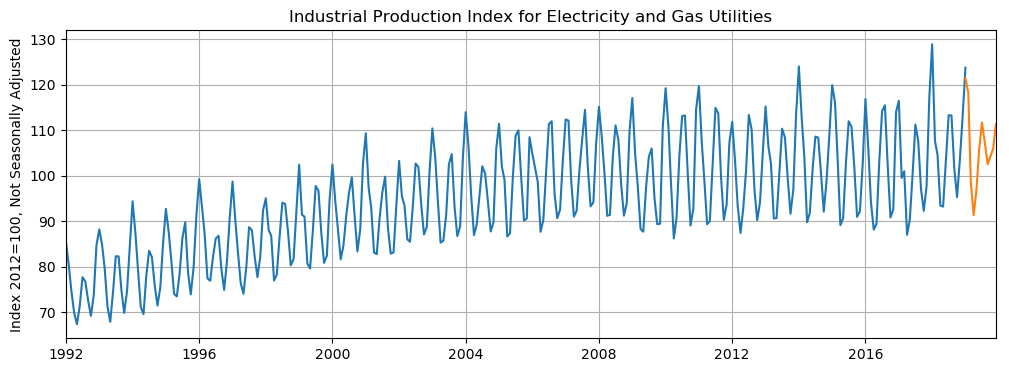

2097152

In [50]:
window_size = 12
future = 12
L = len(y)

preds = y_norm[-window_size:].tolist()

model.eval()

for i in range(future):
    seq = torch.FloatTensor(preds[-window_size:]).cuda()
    with torch.no_grad():
        gpumodel.hidden = (torch.zeros(1,1,model.hidden_size).cuda(),
                        torch.zeros(1,1,model.hidden_size).cuda())
        preds.append(gpumodel(seq).cpu().item())
        
print(len(preds))


true_predictions = scaler.inverse_transform(np.array(preds).reshape(-1, 1))

x = np.arange('2019-01-01', '2020-01-01', dtype='datetime64[M]').astype('datetime64[D]')

plt.figure(figsize=(12,4))
plt.title('Industrial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(df['IPG2211A2N'])
plt.plot(x,true_predictions[-window_size:])
plt.show()


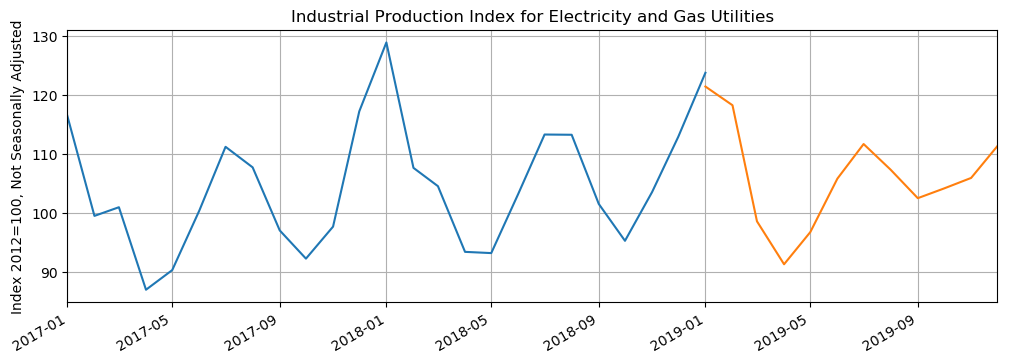

In [49]:
fig = plt.figure(figsize=(12,4))
plt.title('Industrial Production Index for Electricity and Gas Utilities')
plt.ylabel('Index 2012=100, Not Seasonally Adjusted')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
fig.autofmt_xdate()
plt.plot(df['IPG2211A2N']['2017-01-01':])
plt.plot(x,true_predictions[-window_size:])
plt.show()

In [51]:
torch.cuda.memory_allocated()

284672

In [52]:
torch.cuda.get_device_name(0)

'NVIDIA GeForce RTX 2060'

In [54]:
torch.cuda.memory_cached()

2097152

import required libraries
import torch
from torch import nn
import torch.nn.functional as F
import torchvision

# basic resdidual block of ResNet34
# This is generic in the sense, it could be used for downsampling of features.
class ResidualBlock(nn.Module):
    def __init__(self, in_channels, out_channels, stride=[1, 1], downsample=None):
        """
        A basic residual block of ResNet
        Parameters
        ----------
            in_channels: Number of channels that the input have
            out_channels: Number of channels that the output have
            stride: strides in convolutional layers
            downsample: A callable to be applied before addition of residual mapping
        """
        super(ResidualBlock, self).__init__()

        self.conv1 = nn.Conv2d(
            in_channels, out_channels, kernel_size=3, stride=stride[0], 
            padding=1, bias=False
        )

        self.conv2 = nn.Conv2d(
            out_channels, out_channels, kernel_size=3, stride=stride[1], 
            padding=1, bias=False
        )

        self.bn = nn.BatchNorm2d(out_channels)
        self.downsample = downsample

    def forward(self, x):
        residual = x
        # applying a downsample function before adding it to the output
        if(self.downsample is not None):
            residual = downsample(residual)

        out = F.relu(self.bn(self.conv1(x)))
        
        out = self.bn(self.conv2(out))
        # note that adding residual before activation 
        out = out + residual
        out = F.relu(out)
        return out
view rawresidual_block.py hosted with ❤ by GitHub
As we have a Residual block in our hand, we can build a ResNet model of arbitrary depth! Let’s quickly build the first five layers of ResNet-34 to get an idea of how to connect the residual blocks.

# downsample using 1 * 1 convolution
downsample = nn.Sequential(
    nn.Conv2d(64, 128, kernel_size=1, stride=2, bias=False),
    nn.BatchNorm2d(128)
)
# First five layers of ResNet34
resnet_blocks = nn.Sequential(
    nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False),
    nn.MaxPool2d(kernel_size=2, stride=2),
    ResidualBlock(64, 64),
    ResidualBlock(64, 64),
    ResidualBlock(64, 128, stride=[2, 1], downsample=downsample)
)

# checking the shape
inputs = torch.rand(1, 3, 100, 100) # single 100 * 100 color image
outputs = resnet_blocks(inputs)
print(outputs.shape)    # shape would be (1, 128, 13, 13)